In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

6.688249719527975e-09
0.0008101539292465569
-26235013943.81421
-26235013943.81421
i_t:: [ 0.00000000e+00  5.60980827e+04  1.04211340e+05  1.43897290e+05
  1.75001185e+05  1.97627513e+05  2.12107448e+05  2.18963650e+05
  2.18873684e+05  2.12633263e+05  2.01120354e+05  1.85261080e+05
  1.65998146e+05  1.44262417e+05  1.20948065e+05  9.68915896e+04
  7.28548623e+04  4.95121996e+04  2.74413823e+04  7.11841550e+03
 -1.10842477e+04 -2.68963658e+04 -4.01458434e+04 -5.07523685e+04
 -5.87191922e+04 -6.41234949e+04 -6.71057723e+04 -6.78586509e+04
 -6.66155129e+04 -6.36392734e+04 -5.92116078e+04 -5.36228811e+04
 -4.71629824e+04 -4.01132198e+04 -3.27393822e+04 -2.52860300e+04
 -1.79720356e+04 -1.09873558e+04 -4.49098716e+03  1.38997439e+03
  6.56026795e+03  1.09555139e+04  1.45404996e+04  1.73068403e+04
  1.92701511e+04  2.04668676e+04  2.09508421e+04  2.07898398e+04
  2.00620419e+04  1.88526562e+04  1.72507159e+04  1.53461373e+04
  1.32270873e+04  1.09777021e+04  8.67617896e+03  6.39325350e+03
  

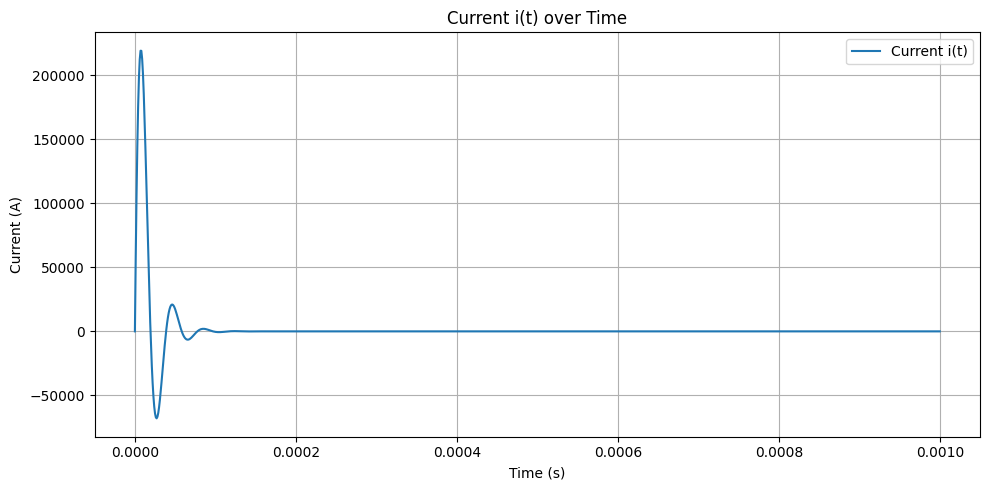

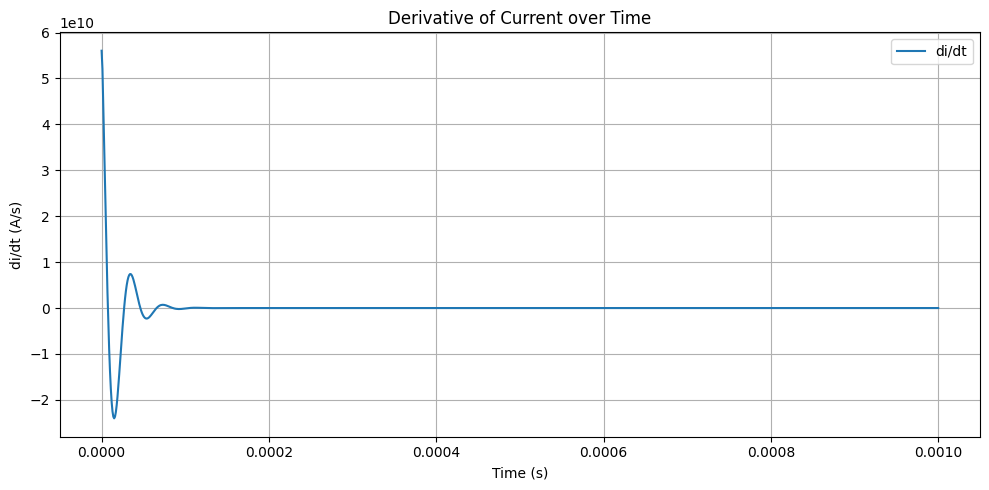

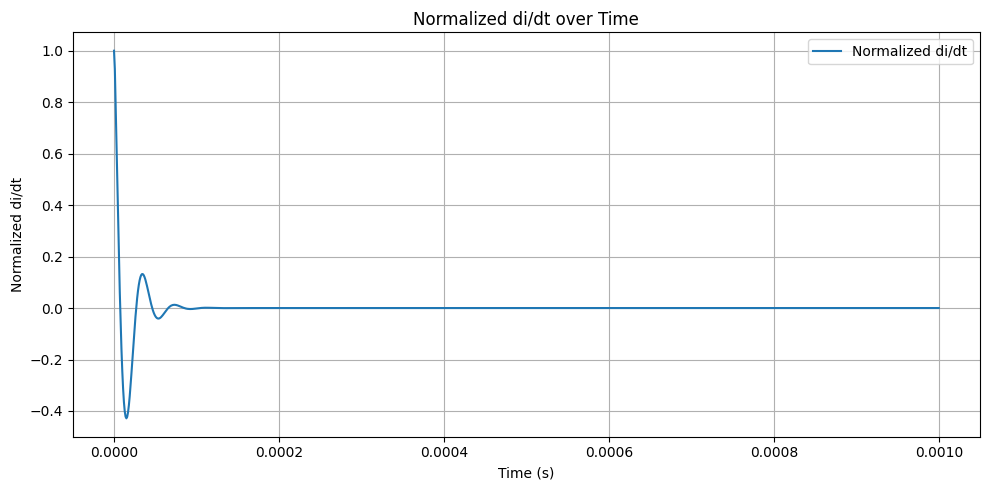

'./normalized_di_dt.txt'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_0 = 4 * np.pi * 1e-7  # permeability of free space in H/m
V0 = 400  # initial voltage in volts (used as a constant factor for the current)
C = 5e-3  # capacitance in farads(F)



# Parameters for the coil, assuming a simple circular loop
coil_inner_diameter_mm = 5  # inner diameter of the coil in cm

R_coil = (coil_inner_diameter_mm / 2) * 1e-3  # coil radius in meters

wire_diameter_awg = 0.644  # diameter of 22 AWG wire in mm

wire_radius_m = (wire_diameter_awg / 2) * 1e-3  # wire radius in meters


rho_copper = 1.68e-8  # resistivity of copper in ohm-meters



# Calculating Inductance L and Resistance R

length_wire = 2 * np.pi * R_coil  # length of the wire in meters

cross_sectional_area = np.pi * (wire_radius_m**2)  # cross-sectional area in m^2

L = mu_0 * R_coil * (np.log(8 * R_coil / wire_radius_m) - 2)  # Inductance in Henries

R = rho_copper * length_wire / cross_sectional_area     # Resistance in Ohms

# R = 0.0000089

# R = 0.000089

print(L)
print(R)





# Time span for the solution in seconds
t_span = np.linspace(0, 0.001, 1000)



# # Calculate angular frequencies for the underdamped case
# omega_1 = R / (2 * L)
# omega_d = np.sqrt(1 / (L * C) - omega_1**2)

# # For discriminant > 0, use the overdamped equation; otherwise, use underdamped
# discriminant = omega_1**2 - 1 / (L * C)



# if discriminant > 0:
#     # Overdamped response (not likely the case we want)
#     i_t = V0 * np.exp(-omega_1 * t_span) * (np.cosh(omega_d * t_span) + (omega_1 / omega_d) * np.sinh(omega_d * t_span))
# else:
    
#     # Underdamped response (likely the case we want based on the plot)
#     i_t = V0 * np.exp(-omega_1 * t_span) * (np.cos(omega_d * t_span) + (omega_1 / omega_d) * np.sin(omega_d * t_span))





# Calculate ω1 and ω2 for the overdamped case
omega_1 = R / (2 * L)
omega_2 = np.sqrt(np.abs((R / (2 * L))**2 - 1 / (L * C)))

# Calculate i(t) for overdamped or underdamped case based on the discriminant
discriminant = (R / (2 * L))**2 - 1 / (L * C)
print(discriminant)

# For discriminant > 0, use the overdamped equation; otherwise, use underdamped
if discriminant > 0:
    i_t = V0 * C * omega_2 * np.exp(-omega_1 * t_span) * (((omega_1 / omega_2)**2) - 1) * np.sinh(omega_2 * t_span)
else:
    i_t = V0 * C * omega_2 * np.exp(-omega_1 * t_span) * (((omega_1 / omega_2)**2) + 1) * np.sin(omega_2 * t_span)








print(discriminant)

print(f"i_t:: {i_t}")
# Compute di/dt
di_dt = np.gradient(i_t, t_span)

# Normalize di/dt
di_dt_max = np.max(np.abs(di_dt))

print(di_dt_max)


normalized_di_dt = di_dt / di_dt_max

# Exporting the normalized di/dt values to a text file
normalized_di_dt_filepath = './normalized_di_dt.txt'
np.savetxt(normalized_di_dt_filepath, normalized_di_dt)



# Plotting the current i(t)
plt.figure(figsize=(10, 5))
plt.plot(t_span, i_t, label='Current i(t)')
plt.title('Current i(t) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Derivative of current di/dt
plt.figure(figsize=(10, 5))
plt.plot(t_span, di_dt, label='di/dt')
plt.title('Derivative of Current over Time')
plt.xlabel('Time (s)')
plt.ylabel('di/dt (A/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Normalized derivative of current normalized di/dt
plt.figure(figsize=(10, 5))
plt.plot(t_span, normalized_di_dt, label='Normalized di/dt')
plt.title('Normalized di/dt over Time')
plt.xlabel('Time (s)')
plt.ylabel('Normalized di/dt')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Return the file path of the exported data
normalized_di_dt_filepath


In [3]:
#PART B

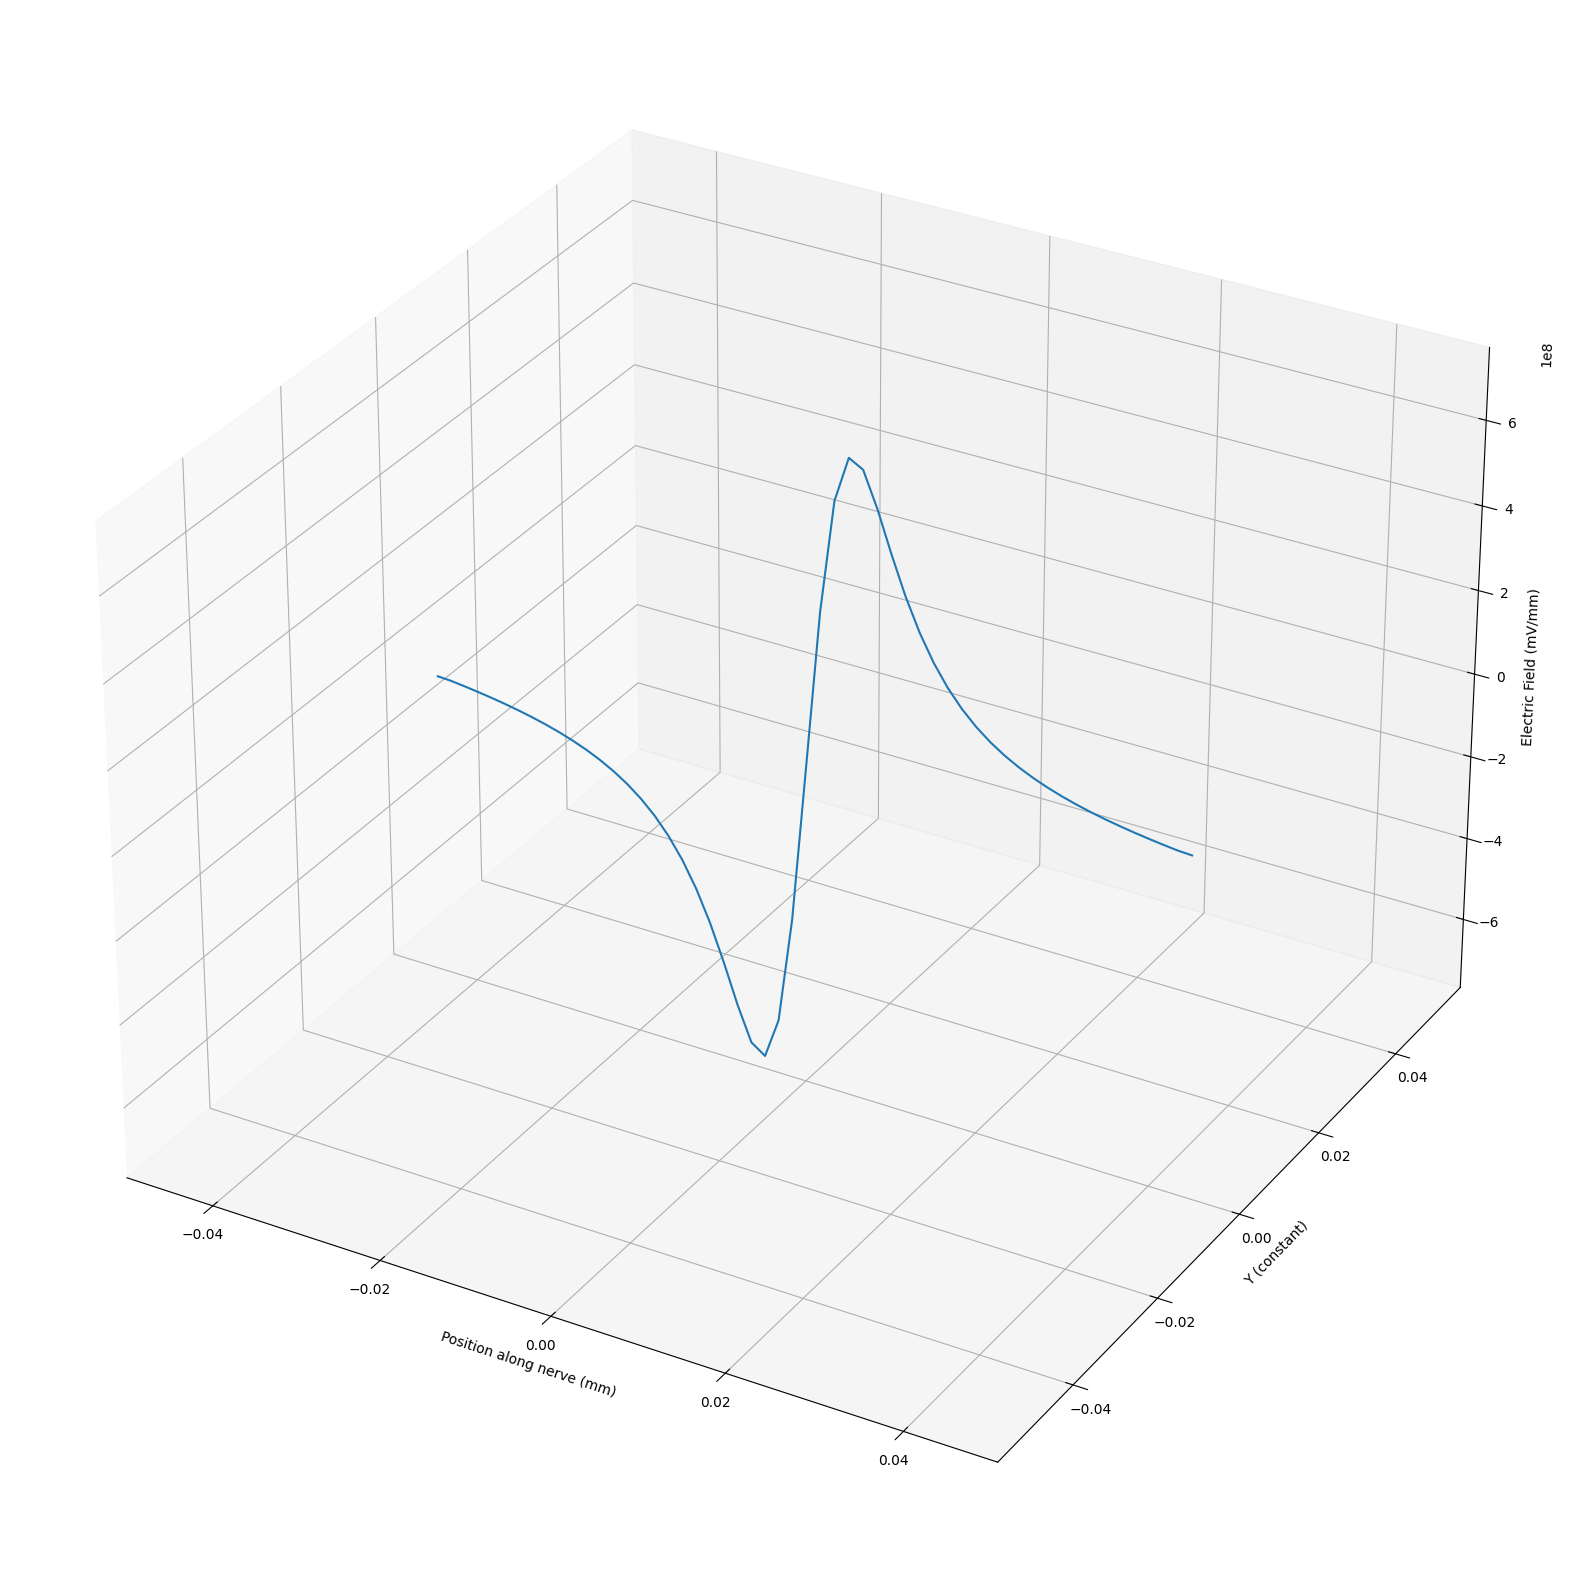

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns
R_coil = 0.0025  # Coil radius in meters
y_offset = 0.004  # Y-offset of the coil center in meters
z = 0.005  # Distance from coil plane to the XY plane in meters
di_dt_max = np.max(np.abs(di_dt))

# Coil discretization
num_points = 55
theta = np.linspace(0, 2 * np.pi, num_points)
dl = 2 * np.pi * R_coil / num_points  # Length of each coil segment
coil_x = R_coil * np.cos(theta)
coil_y = R_coil * np.sin(theta) + y_offset

# Define node positions along the nerve
num_nodes = 55
node_spacing = 0.0016  # Spacing between nodes in meters
node_positions = np.linspace(-num_nodes/2 * node_spacing, num_nodes/2 * node_spacing, num_nodes)

# Function to calculate magnetic vector potential A at a point
def calculate_vector_potential(point_x, coil_x, coil_y, dl, di_dt_max):
    A = 0
    for i in range(len(coil_x)):
        r_vec = np.array([point_x, 0, 0]) - np.array([coil_x[i], coil_y[i], z])
        distance = np.linalg.norm(r_vec)
        A += mu_0 * N * di_dt_max / (4 * np.pi * distance) * dl
    return A

# Calculate magnetic field vector A and E for each node
A_values = np.array([calculate_vector_potential(x, coil_x, coil_y, dl, di_dt_max) for x in node_positions])
E_field = -np.gradient(A_values, node_positions) * 1e3


# Plotting the electric field along the nerve
fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(111, projection='3d')

ax.plot(node_positions, np.zeros_like(node_positions), E_field)
ax.set_zlabel('Electric Field (mV/mm)')
ax.set_xlabel('Position along nerve (mm)')
ax.set_ylabel('Y (constant)')

plt.show()


In [5]:
E_field.shape
print(E_field)

[-4.57201154e+07 -4.74877239e+07 -5.12334076e+07 -5.54342867e+07
 -6.01660196e+07 -6.55203488e+07 -7.16092813e+07 -7.85705490e+07
 -8.65747961e+07 -9.58351088e+07 -1.06619732e+08 -1.19269128e+08
 -1.34218926e+08 -1.52030730e+08 -1.73433089e+08 -1.99374535e+08
 -2.31088093e+08 -2.70157859e+08 -3.18552413e+08 -3.78519649e+08
 -4.52057958e+08 -5.39262761e+08 -6.34103257e+08 -7.15900941e+08
 -7.39305196e+08 -6.40890511e+08 -3.84251997e+08 -1.15428893e+07
  3.65113547e+08  6.30804079e+08  7.37882711e+08  7.19538158e+08
  6.39468338e+08  5.44563748e+08  4.56648491e+08  3.82295386e+08
  3.21601465e+08  2.72612096e+08  2.33071171e+08  2.00988346e+08
  1.74757564e+08  1.53127406e+08  1.35134952e+08  1.20040702e+08
  1.07274798e+08  9.63953979e+07  8.70573424e+07  7.89888179e+07
  7.19740052e+07  6.58401513e+07  6.04478836e+07  5.56839089e+07
  5.14554680e+07  4.76860933e+07  4.59075171e+07]


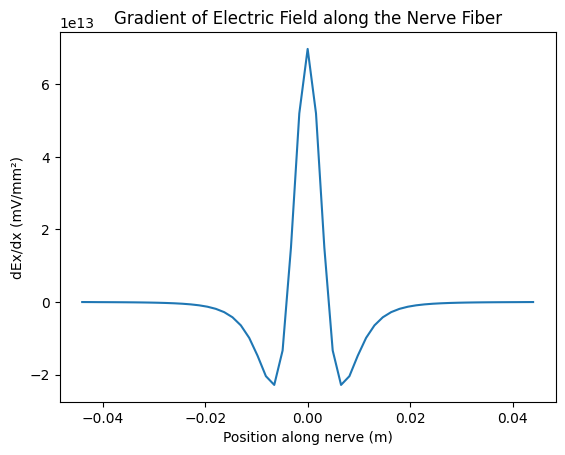

Gradient of Ex along the nerve fiber (mV/mm^2): [-1.75538765e+10 -2.81643194e+10 -4.29173961e+10 -5.23029198e+10
 -6.42421982e+10 -7.95760124e+10 -9.94732137e+10 -1.25579960e+11
 -1.60246972e+11 -2.06881067e+11 -2.70497810e+11 -3.58604944e+11
 -4.82638102e+11 -6.60331053e+11 -9.19681370e+11 -1.30564003e+12
 -1.89136475e+12 -2.79665117e+12 -4.21562743e+12 -6.44786953e+12
 -9.88960807e+12 -1.48120165e+13 -2.04514854e+13 -2.28601027e+13
 -1.33689051e+13  1.49690533e+13  5.19741031e+13  6.97466103e+13
  5.19741031e+13  1.49690533e+13 -1.33689051e+13 -2.28601027e+13
 -2.04514854e+13 -1.48120165e+13 -9.88960807e+12 -6.44786953e+12
 -4.21562743e+12 -2.79665117e+12 -1.89136475e+12 -1.30564003e+12
 -9.19681370e+11 -6.60331053e+11 -4.82638102e+11 -3.58604944e+11
 -2.70497810e+11 -2.06881067e+11 -1.60246972e+11 -1.25579960e+11
 -9.94732137e+10 -7.95760124e+10 -6.42421982e+10 -5.23029198e+10
 -4.29173961e+10 -2.81643194e+10 -1.75538765e+10]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns
R_coil = 0.0025  # Coil radius in meters
y_offset = 0.004  # Y-offset of the coil center in meters
z = 0.005  # Distance from coil plane to the XY plane in meters


# Coil discretization
num_points = 55
theta = np.linspace(0, 2 * np.pi, num_points)
dl = 2 * np.pi * R_coil / num_points  # Length of each coil segment
coil_x = R_coil * np.cos(theta)
coil_y = R_coil * np.sin(theta) + y_offset

# Define node positions along the nerve
num_nodes = 55
node_spacing = 0.0016  # Spacing between nodes in meters
node_positions = np.linspace(-num_nodes/2 * node_spacing, num_nodes/2 * node_spacing, num_nodes)

# Function to calculate magnetic vector potential A at a node
def calculate_vector_potential(point_x, coil_x, coil_y, dl, di_dt_max):
    A = 0
    for i in range(len(coil_x)):
        r_vec = np.array([point_x, 0, 0]) - np.array([coil_x[i], coil_y[i], z])
        distance = np.linalg.norm(r_vec)
        dl_vec = np.array([-dl * np.sin(theta[i]), dl * np.cos(theta[i]), 0])
        A += mu_0 * N * di_dt_max / (4 * np.pi * distance) * np.dot(dl_vec, [1, 0, 0])
    return A

# Calculate A and E for each node
A_values = np.array([calculate_vector_potential(x, coil_x, coil_y, dl, di_dt_max) for x in node_positions])

E_x = -np.gradient(A_values, node_positions)  # Electric field Ex(x, y)

# Calculate the spatial gradient of Ex
dEx_dx = np.gradient(E_x, node_positions)  # Gradient of Ex along x-axis

# Convert from V/m to mV/mm² for compatibility with NEURON
dEx_dx_mm2 = dEx_dx * 1e6  # V/m to mV/mm²

# Plotting
fig, ax = plt.subplots()
ax.plot(node_positions, dEx_dx_mm2)
ax.set_xlabel('Position along nerve (m)')
ax.set_ylabel('dEx/dx (mV/mm²)')
ax.set_title('Gradient of Electric Field along the Nerve Fiber')
plt.show()

# Output dEx_dx_mm2 for use in NEURON simulation
print("Gradient of Ex along the nerve fiber (mV/mm^2):", dEx_dx_mm2)


In [7]:
print(dEx_dx_mm2.shape)

# Exporting the normalized di/dt values to a text file
dEx_dx_filepath = './dEx_dx.txt'
np.savetxt(dEx_dx_filepath, dEx_dx_mm2)


(55,)


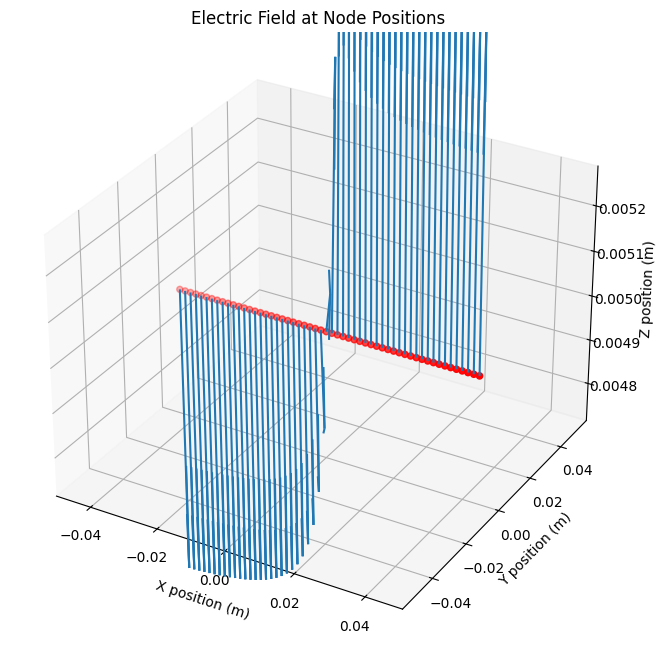

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns
R_coil = 0.0025  # Coil radius in meters
y_offset = 0.004  # Y-offset of the coil center in meters
z = 0.005  # Distance from coil plane to the XY plane in meters

# Define the max di/dt value here based on results from Part A
di_dt = np.max(di_dt)  

# Define the number of nodes and their positions along the nerve
num_nodes = 55
distance_between_nodes_mm = 1.6
node_positions_mm = np.linspace(-num_nodes / 2 * distance_between_nodes_mm,
                                num_nodes / 2 * distance_between_nodes_mm,
                                num_nodes)
node_positions = node_positions_mm / 1000  # Convert from mm to m


# Coil discretization
num_points = 100
theta = np.linspace(0, 2 * np.pi, num_points)
dl = 2 * np.pi * R_coil / num_points  # Length of each coil segment
coil_x = R_coil * np.cos(theta)
coil_y = R_coil * np.sin(theta)

# Function to calculate vector potential at a point
def calculate_vector_potential(point, coil_x, coil_y, dl, di_dt):
    A = np.zeros(3)
    for i in range(len(coil_x)):
        dl_vec = np.array([-dl * np.sin(theta[i]), dl * np.cos(theta[i]), 0])
        r_vec = point - np.array([coil_x[i], coil_y[i] + y_offset, 0])
        distance = np.linalg.norm(r_vec)
        A += mu_0 * N * di_dt / (4 * np.pi * distance) * dl_vec
    return A

# Compute the electric field at each node
E_nodes = np.zeros((len(node_positions), 3))
for i, x_pos in enumerate(node_positions):
    point = np.array([x_pos, 0, z])  # Point at which we're calculating A
    A = calculate_vector_potential(point, coil_x, coil_y, dl, di_dt)
    E_nodes[i] = -np.gradient(A, axis=0)  # Electric field is negative gradient of A
    
    
    
    
    

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the nodes as points
ax.scatter(node_positions, np.zeros_like(node_positions), z * np.ones_like(node_positions), color='r')

# Plot the electric field as vectors
ax.quiver(node_positions, np.zeros_like(node_positions), z * np.ones_like(node_positions),
          E_nodes[:, 0], E_nodes[:, 1], E_nodes[:, 2], length=1e-3, normalize=True)

ax.set_xlabel('X position (m)')
ax.set_ylabel('Y position (m)')
ax.set_zlabel('Z position (m)')
ax.set_title('Electric Field at Node Positions')

plt.show()


C:\Users\moham\AppData\Local\Temp\ipykernel_5804\1564403175.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
C:\Users\moham\AppData\Local\Temp\ipykernel_5804\1564403175.py:88: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
C:\Users\moham\AppData\Local\Temp\ipykernel_5804\1564403175.py:98: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()
C:\Users\moham\AppData\Local\Temp\ipykernel_5804\1564403175.py:108: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig4.show()


'dEx_dx.txt'

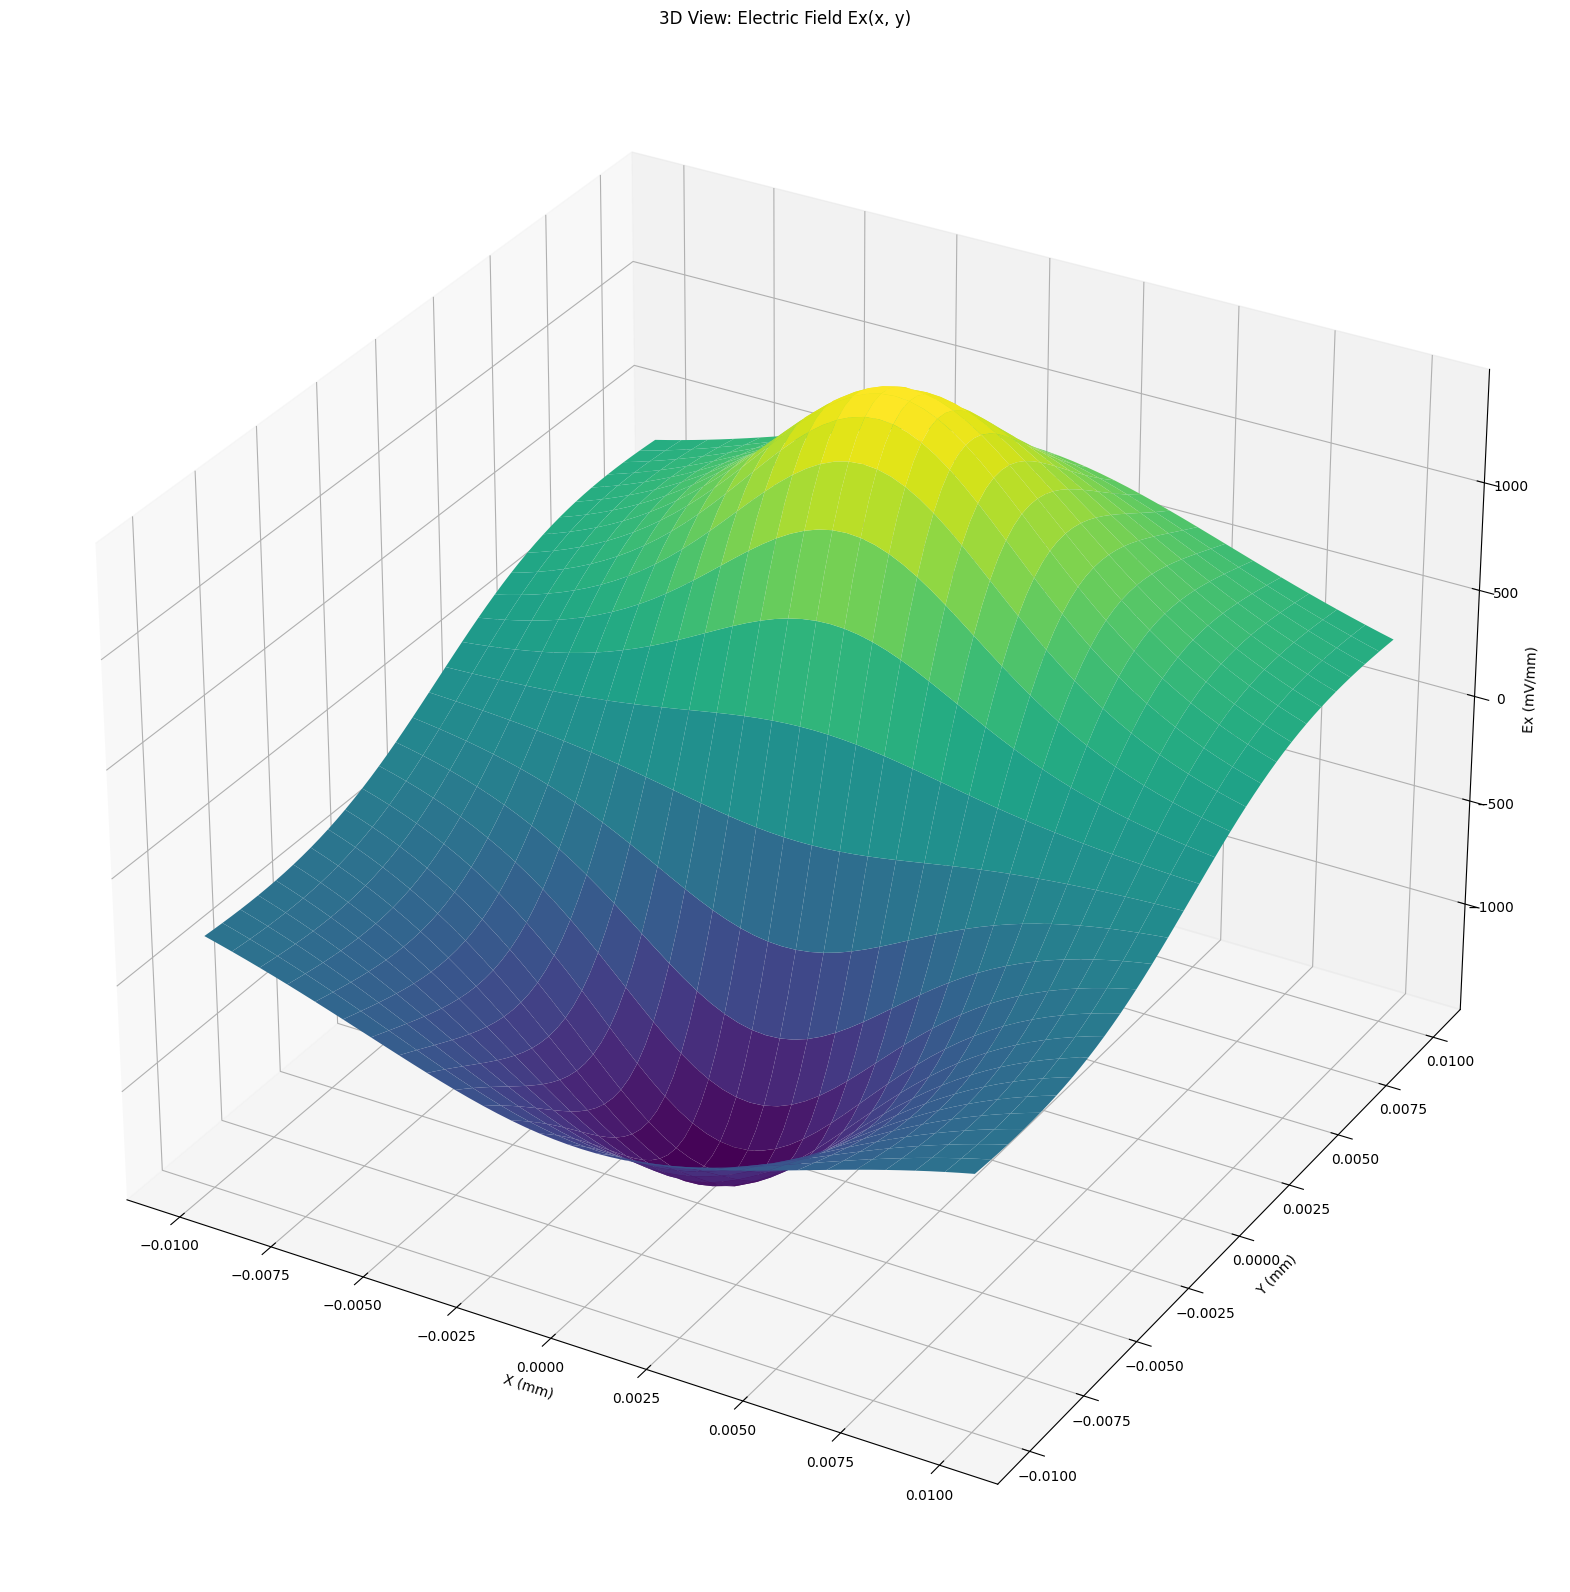

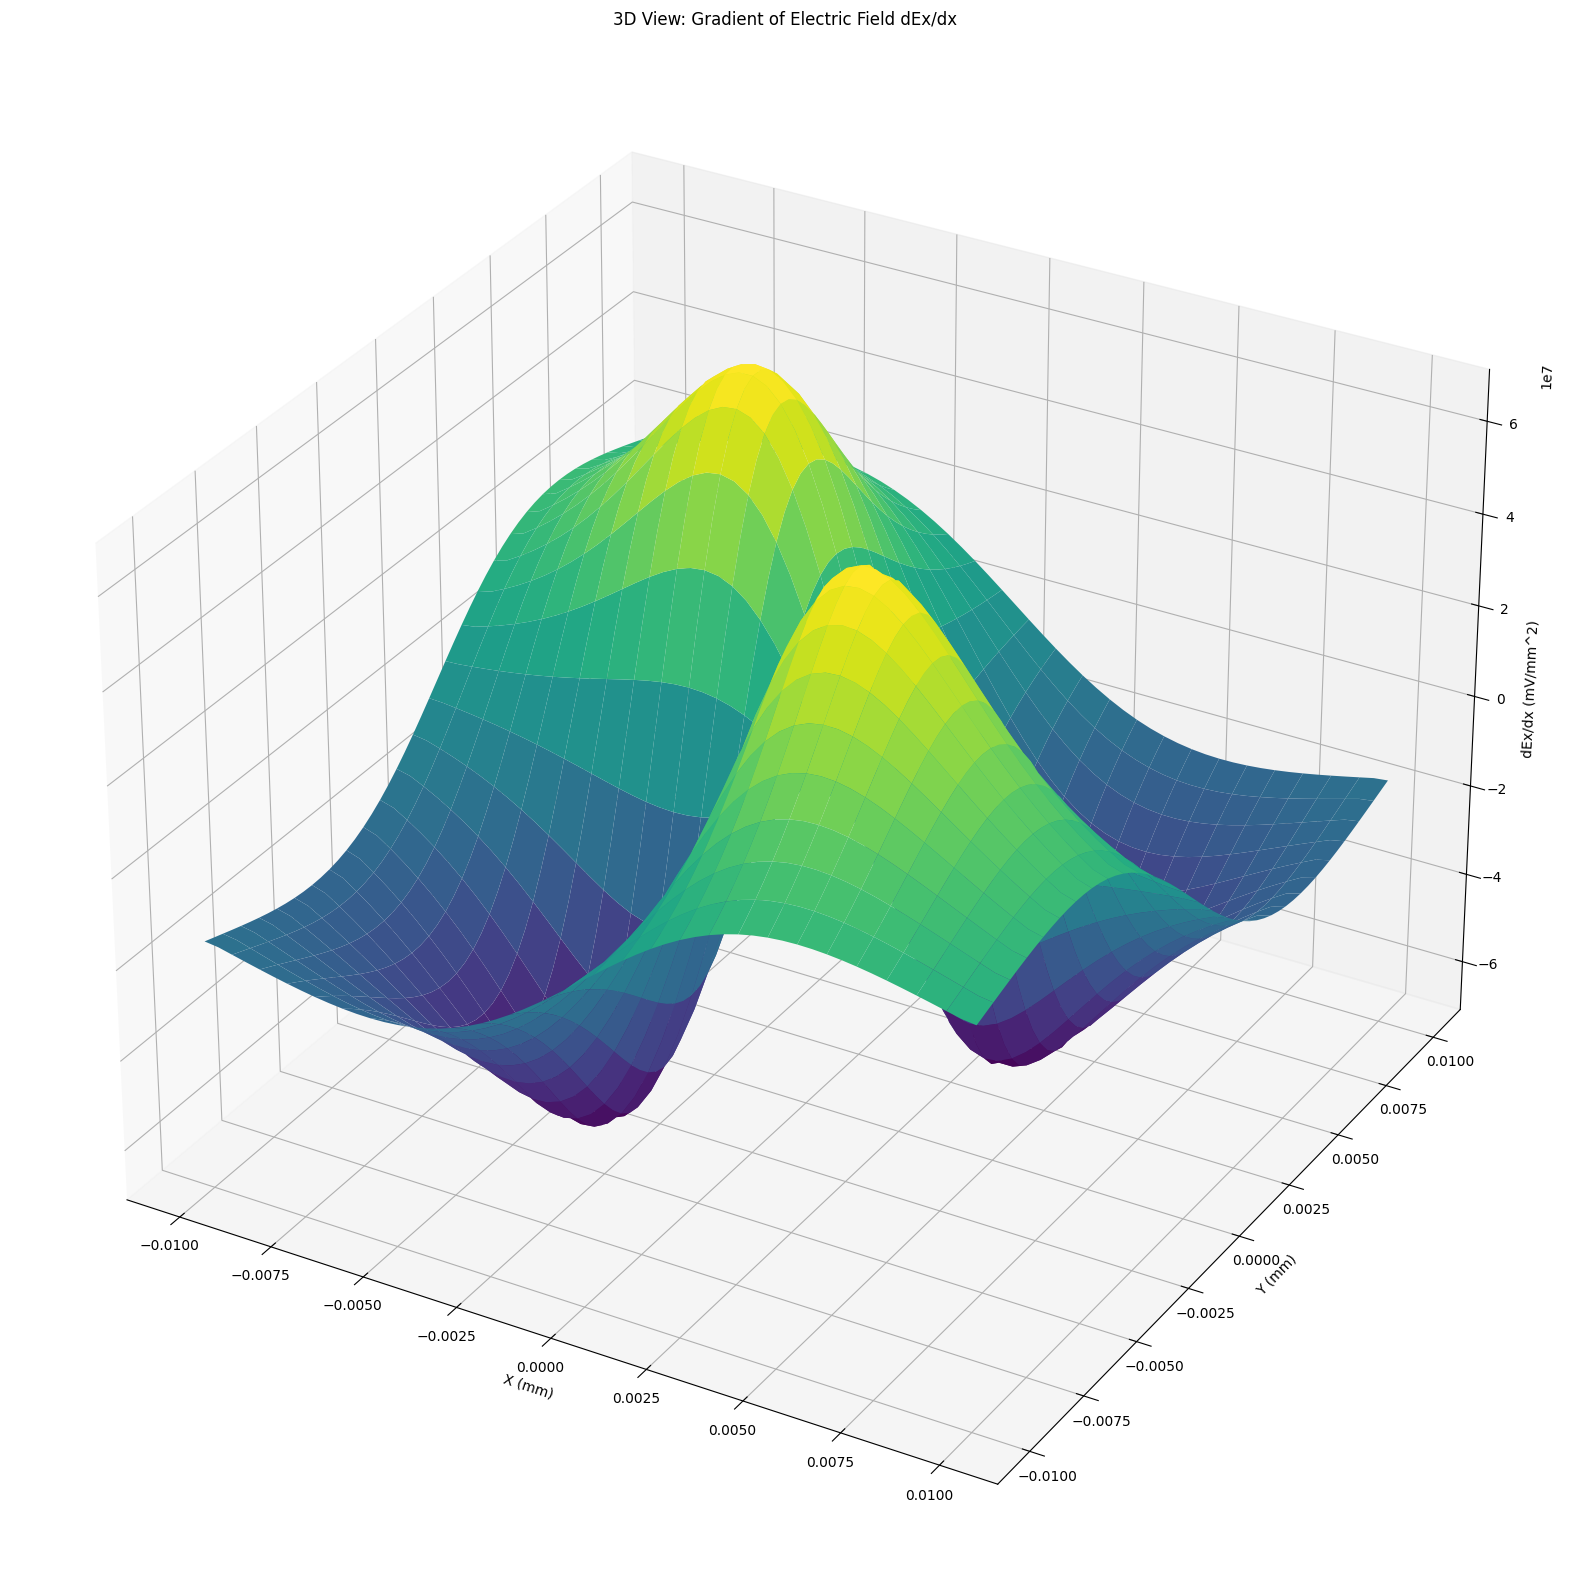

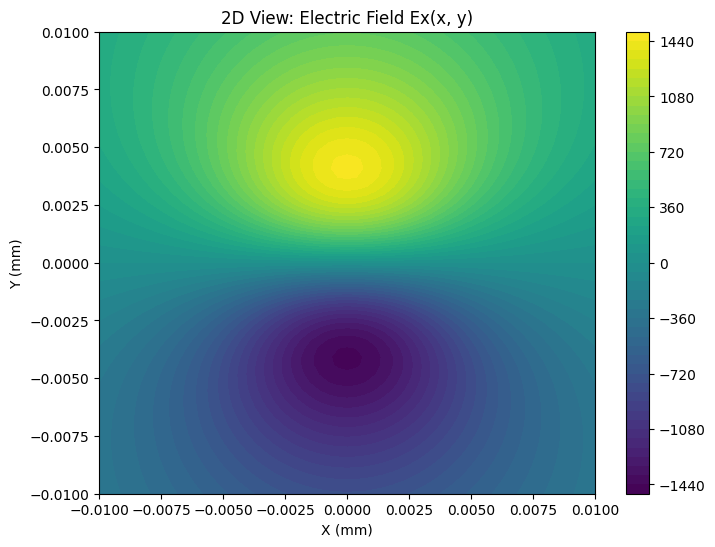

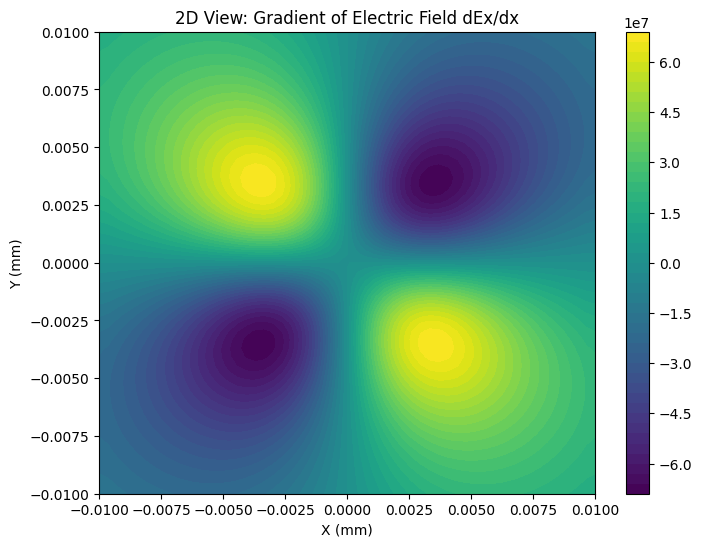

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns
R_coil = 0.0025  # Coil radius in meters
y_offset = 0.004  # Y-offset of the coil center in meters
z = 0.005  # Distance from coil plane to the XY plane in meters

# value for the maximum di/dt (A/s), replace with actual value
di_dt_max = np.max(di_dt)  

# Coil discretization
num_points = 55
theta = np.linspace(0, 2 * np.pi, num_points)
dl = 2 * np.pi * R_coil / num_points  # Length of each coil segment
coil_x = R_coil * np.cos(theta)
coil_y = R_coil * np.sin(theta)

# Define the number of nodes and their positions along the nerve
num_nodes = 55
distance_between_nodes_mm = 1.6
node_positions_mm = np.linspace(-num_nodes / 2 * distance_between_nodes_mm,
                                num_nodes / 2 * distance_between_nodes_mm,
                                num_nodes)
node_positions = node_positions_mm / 1000  # Convert from mm to m

# Define the XY grid for the electric field calculation
grid_size = 55
x_range = np.linspace(-0.01, 0.01, grid_size)
y_range = np.linspace(-0.01, 0.01, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Function to calculate magnetic vector potential A at a node
def calculate_vector_potential(point, coil_x, coil_y, dl, di_dt_max):
    A = np.zeros(3)
    for i in range(len(coil_x)):
        dl_vec = np.array([-dl * np.sin(theta[i]), dl * np.cos(theta[i]), 0])
        r_vec = point - np.array([coil_x[i], coil_y[i], 0])
        distance = np.linalg.norm(r_vec)
        A += mu_0 * N * di_dt_max / (4 * np.pi * distance) * dl_vec
    return A

# Compute the electric field at each point on the grid
E_field = np.zeros((grid_size, grid_size, 3))
for i in range(grid_size):
    for j in range(grid_size):
        point = np.array([X[i, j], Y[i, j], z])  # XY plane through the nerve center
        A = calculate_vector_potential(point, coil_x, coil_y, dl, di_dt_max)
        E_field[i, j] = -A  # Placeholder for actual dB/dt calculation

# Extract Ex component and calculate its spatial gradient dEx/dx
E_x = E_field[:, :, 0]

dEx_dx = np.gradient(E_x, axis=1)  # Gradient along x-axis

# Convert electric field gradient from V/m^2 to mV/mm^2
dEx_dx= dEx_dx * 1e6



# Exporting the normalized dE_x/dx values to a text file
dE_x_dx_filepath = 'dEx_dx.txt'
np.savetxt(dE_x_dx_filepath, dEx_dx)


# 3D Surface plot of Electric Field Ex(x, y)
fig1 = plt.figure(figsize=(20, 30))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, E_x, cmap='viridis')
ax1.set_title('3D View: Electric Field Ex(x, y)')
ax1.set_xlabel('X (mm)')
ax1.set_ylabel('Y (mm)')
ax1.set_zlabel('Ex (mV/mm)')
fig1.show()

# 3D Surface plot of Gradient of Electric Field dEx/dx
fig2 = plt.figure(figsize=(20, 30))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X, Y, dEx_dx, cmap='viridis')
ax2.set_title('3D View: Gradient of Electric Field dEx/dx')
ax2.set_xlabel('X (mm)')
ax2.set_ylabel('Y (mm)')
ax2.set_zlabel('dEx/dx (mV/mm^2)')
fig2.show()

# 2D Contour plot of Electric Field Ex(x, y)
fig3 = plt.figure(figsize=(8, 6))
ax3 = fig3.add_subplot(111)
contour1 = ax3.contourf(X, Y, E_x, cmap='viridis', levels=50)
fig3.colorbar(contour1, ax=ax3)
ax3.set_title('2D View: Electric Field Ex(x, y)')
ax3.set_xlabel('X (mm)')
ax3.set_ylabel('Y (mm)')
fig3.show()

# 2D Contour plot of Gradient of Electric Field dEx/dx
fig4 = plt.figure(figsize=(8, 6))
ax4 = fig4.add_subplot(111)
contour2 = ax4.contourf(X, Y, dEx_dx, cmap='viridis', levels=50)
fig4.colorbar(contour2, ax=ax4)
ax4.set_title('2D View: Gradient of Electric Field dEx/dx')
ax4.set_xlabel('X (mm)')
ax4.set_ylabel('Y (mm)')
fig4.show()


# Return the file path of the exported data
dE_x_dx_filepath

C:\Users\moham\AppData\Local\Temp\ipykernel_5804\527986142.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig5.show()
C:\Users\moham\AppData\Local\Temp\ipykernel_5804\527986142.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig6.show()


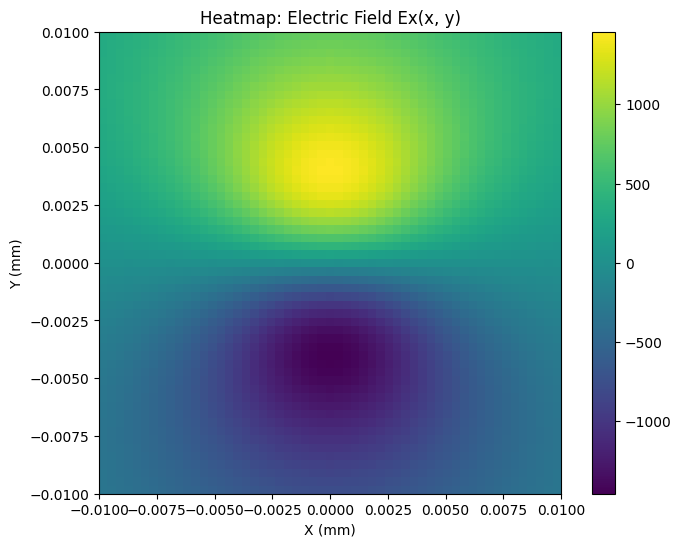

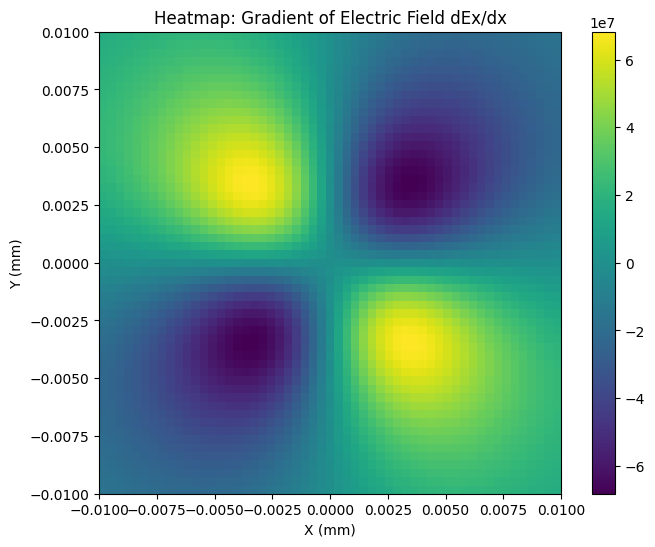

In [10]:
# 2D Heatmap of Electric Field Ex(x, y)
fig5 = plt.figure(figsize=(8, 6))
ax5 = fig5.add_subplot(111)
heatmap1 = ax5.imshow(E_x, extent=(x_range.min(), x_range.max(), y_range.min(), y_range.max()), origin='lower', cmap='viridis')
fig5.colorbar(heatmap1, ax=ax5)
ax5.set_title('Heatmap: Electric Field Ex(x, y)')
ax5.set_xlabel('X (mm)')
ax5.set_ylabel('Y (mm)')
fig5.show()

# 2D Heatmap of Gradient of Electric Field dEx/dx
fig6 = plt.figure(figsize=(8, 6))
ax6 = fig6.add_subplot(111)
heatmap2 = ax6.imshow(dEx_dx, extent=(x_range.min(), x_range.max(), y_range.min(), y_range.max()), origin='lower', cmap='viridis')
fig6.colorbar(heatmap2, ax=ax6)
ax6.set_title('Heatmap: Gradient of Electric Field dEx/dx')
ax6.set_xlabel('X (mm)')
ax6.set_ylabel('Y (mm)')
fig6.show()

In [11]:
# Exporting the normalized dE_x/dx values to a text file
# dE_x_dx_filepath = 'dEx_dx.txt'
# np.savetxt(dE_x_dx_filepath, dEx_dx)

dEx_dx.shape

(55, 55)